In [0]:
%tensorflow_version 1.x

# CNN(Convolutional Neural Networks)
* 고양이 실험에서 시작: 고양이에게 어떤 이미지를 보여줬더니, 그림을 읽어들이는 뉴런들이 특정 그림의 특정 부분에 대해서만 동작하는 것
* 즉, 고양이가 이미지를 입력을 나누어서 받아 뉴런에게 나누어진 입력들을 처리하게 된 것

<br><br>

### 이미지 처리 과정(하나의 convolutioin layer 만들기)
1. 먼저 32x32x3 형태의 이미지(또는 벡터)가 존재한다고 하자.  
![image](https://user-images.githubusercontent.com/38516906/76270498-d24d3080-62b8-11ea-8f79-40cbf0604ec3.png)
  * 이 때 32x32는 크기(width x height) 라고 가정하고, 3(depth)은 이미지 색상의 종류(RGB)라고 생각하자.  
  * 그리고 위에서 이야기했던 것과 같이 이미지에 대해 전체적으로 처리하는 것이 아니라, <br> **빨간색 부분과 같이 일부분을 처리**한다고 하자.
  * 우리는 이러한 빨간색 부분을 **filter**라고 부르는데, 이 필터의 크기는 우리가 정할 수 있다.<br>이 필터는 전체 이미지의 5x5 영역만 읽어들인다. 그리고 그 영역을 읽어서 하나의 숫자를 뽑아낸다.
    * 예외적으로 이미지의 대한 색의 종류, 3은 고정시키고<br>단순히 크기에 대한 형태만 지정할 수 있다.
    * 그러니까 7x7x3, 10x10x3같은 것이 가능하다는 말이다.
  * 결과물을 하나의 숫자로 표현하기 위해서는 어떻게 해야할까?<br>Wx+b의 형태를 이용해서 뽑아내면 된다.
  ![image](https://user-images.githubusercontent.com/38516906/76270702-79ca6300-62b9-11ea-9572-e947d36d3ca4.png)
    * 여기서 W는 우리가 어떤 영역에 대해 하나의 숫자를 만들어내는데 사용되는 필터의 값이라고 생각하면 된다.
 <br>

2. 이렇게 결정된 W에 대해 변하지 않도록 고정하고 전체 이미지를 흝도록 한다.<br>즉 아래의 그림과 같이 하나의 필터가 전체의 이미지를 스캔한다.
![image](https://user-images.githubusercontent.com/38516906/76270810-dfb6ea80-62b9-11ea-9ff2-e953cdd9c9e4.png)
  * 빨간색, 파란색, 초록색 테두리를 가진 것과 같이 하나의 필터를 한 칸 또는 그 이상 씩 이동시키며 전체 이미지를 확인한다.
  * 저런 식으로 움직이면, 결과값들은 7x7의 형태를 가지게 될 것이다.
  * 이 때 우리가 한칸 씩 필터를 움직였을 때 움직이는 크기를 **stride**라고 한다.<br> 즉, 우리는 strides를 1로 설정한 것이다.
    * 그럼 stride를 2로 설정한다면? 아래와 같은 그림이 나올 것이다.
    ![image](https://user-images.githubusercontent.com/38516906/76271093-b34f9e00-62ba-11ea-8efc-ca3188252911.png)
  * 이 결과물을 바탕으로, 우리는 NxN 형태의 이미지에서 FxF형태의 필터를 이용했을 때 stride를 설정하면 output size를 알아낼 수 있다.  
    ![image](https://user-images.githubusercontent.com/38516906/76271170-fc9fed80-62ba-11ea-9527-0078693def46.png)
    * 단, 정수로 나눠떨어지지 않을 경우 그 필터의 형태나 stride 사용 불가능
<br>

3. 그런데, 이렇게 사용하게 되면 기본 이미지보다 output size가 작아지면서 정보 손실의 문제가 발생할 수 있다.
* 이를 막기 위한 방법이 바로 **padding**이다.  
![image](https://user-images.githubusercontent.com/38516906/76271418-ca42c000-62bb-11ea-8007-86d2d8575062.png)
  * 기본 이미지의 모서리에 0이라는 값으로 채워주는 것을 padding이라고 한다.
  * padding을 하는 이유는 두 가지가 있는데,
    * 이미지의 형태가 급격하게 작아지는 것을 방지
    * 이미지의 모서리임을 알려줌
  * 위의 사진에서 pad를 1pixel로 설정해서 output size를 확인해보면 7x7이 나오게 된다. 즉 입력 이미지와 출력 이미지의 size가 같게 된다.  


<br><br>

### 여러 convolution layer 만들기
* 이러한 방법으로 여러 개의 layer를 만든다. 이 때 새롭게 이용되는 filter는 이전의 filter와 W값이 다를 것이다.
![image](https://user-images.githubusercontent.com/38516906/76272370-a0d76380-62be-11ea-89ae-83ee84062272.png)
* 이렇게 만들어진 layer들의 형태 (?, ?, ?)에서 마지막 세번째 값을 변경하면서 layer들을 제작한다.
![image](https://user-images.githubusercontent.com/38516906/76272494-e72cc280-62be-11ea-8775-a9d932426ee4.png)

<br><br>

### 기타
#### 1) Pooling
![image](https://user-images.githubusercontent.com/38516906/76272569-24915000-62bf-11ea-8065-cac75d04033c.png)
* CNN의 전체적인 구조를 확인해보면, Convolution과 ReLU가 붙어있으며 중간에 한번 씩 pool을 하게 된다
* pool은 간단하게 생각하면, **sampling**이라고 하면 된다.
![image](https://user-images.githubusercontent.com/38516906/76272685-69b58200-62bf-11ea-8dc0-e0057ac30ffe.png)
  * pooling은 정확하게 말하면, 우리가 입력 이미지에 대해서 convolution layer를 만드는데, 하나의 layer만 뽑아내고 이를 resize하는 과정을 의미한다.
  * 말로만 하면 어려우니 예시를 보면서 다시 생각해보록 하자.
    * pooling 중에서도 많이 사용되는 max pooling은 아래 사진과 같이 진행된다.
  ![image](https://user-images.githubusercontent.com/38516906/76272918-e183ac80-62bf-11ea-8f90-e989b9093ca4.png)
    * filter라는 개별을 다시 사용해서, stride는 2로 설정하여 값을 추출한다.<br>max pooling은 그 묶음에서 가장 큰 값을 뽑아낸다.

<br>

#### 2) FC layer (Fully Connected Layer)
이전 layer의 모든 node가 다음 layer의 모든 노드에 연결된 것

### 예제
![image](https://user-images.githubusercontent.com/38516906/76273672-c3b74700-62c1-11ea-92fd-38829a17699c.png)
 * 한 개의 이미지를 3x3으로, 한 가지의 색으로 만들 것이기 때문에 **(1, 3, 3, 1)**

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


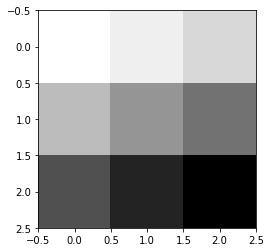

In [9]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap = 'Greys')

![image](https://user-images.githubusercontent.com/38516906/76274212-54425700-62c3-11ea-817d-e07a712a448f.png)
* filter의 크기는 2x2, 하나의 색상을 가지고, 1개의 필터를 만들 것이기 때문에 **(2,2,1,1)**
* 1x2 + 2x1 + 4x1 + 5x1 = 12
* padding 관련해서
  * same: 결과값이 입력의 shape와 일치하도록 tensorflow에서 자동으로 모서리를 0으로 채움
  * valid: 유효 영역만 출력. 결과값이 입력 shape보다 작다(padding 없음)
  * 아래 예시를 보면 더욱 빠르게 이해할 수 있을 것 같다.
    * Input width = 13
    * Filter width = 6
    * Stride = 5

    ```
    # valid: without padding 
    inputs:     1  2  3  4  5  6  7  8  9  10 11 (12 13)
                |________________|                dropped
                              |_________________|

    # same : with zero padding
                pad|                                      |pad
    inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0
                |________________|
                               |_________________|
                                              |________________|
    ```

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


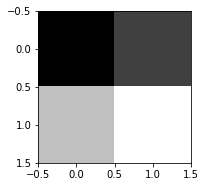

In [12]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print('weight.shape', weight.shape)



conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding = 'VALID')
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(2,2))
  plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

* 그러면 padding을 same으로 둔다면 어떻게 될까?  
* 아래 그림처럼 될 것이다.  
![image](https://user-images.githubusercontent.com/38516906/76279179-164c2f80-62d1-11ea-8e50-1c7de1155890.png)


image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


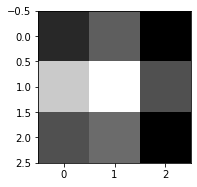

In [15]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print('weight.shape', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'SAME')
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3, 3))
  plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')